# Drought Prediction 

Data Source- https://www.kaggle.com/cdminix/us-drought-meteorological-data

## Importing necessary library

In [1]:
#Core library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sklearn Funtionality
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluation of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Creating a Pandas DataFrame from a CSV file

In [2]:
train_data=pd.read_csv('./drought/train_timeseries.csv')

In [3]:
train_data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [4]:
train_data.shape

(19300680, 21)

In [5]:
train_data.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [6]:
train_data.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

### Meteorological Indicators


* **WS10M_MIN:** Minimum Wind Speed at 10 Meters (m/s)
* **QV2M:** Specific Humidity at 2 Meters (g/kg)
* **T2M_RANGE:** Temperature Range at 2 Meters (C)
* **WS10M:** Wind Speed at 10 Meters (m/s)
* **T2M:** Temperature at 2 Meters (C)
* **WS50M_MIN:** Minimum Wind Speed at 50 Meters (m/s)
* **T2M_MAX:** Maximum Temperature at 2 Meters (C)
* **WS50M:** Wind Speed at 50 Meters (m/s)
* **TS:** Earth Skin Temperature (C)
* **WS50M_RANGE:** Wind Speed Range at 50 Meters (m/s)
* **WS50M_MAX:** Maximum Wind Speed at 50 Meters (m/s)
* **WS10M_MAX:** Maximum Wind Speed at 10 Meters (m/s)
* **WS10M_RANGE:** Wind Speed Range at 10 Meters (m/s)
* **PS:** Surface Pressure (kPa)
* **T2MDEW:** Dew/Frost Point at 2 Meters (C)
* **T2M_MIN:** Minimum Temperature at 2 Meters (C)
* **T2MWET:** Wet Bulb Temperature at 2 Meters (C)
* **PRECTOT:** Precipitation (mm day-1)

## Checking and Cleaning DataSet

In [3]:
train_data.insert(loc=0, column='number', value=np.arange(len(train_data)))

In [ ]:
train_data.head()

In [4]:
sampled_train_data = train_data[(train_data['number'] % 10) == 0]
sampled_train_data.shape

(1930068, 22)

In [10]:
sampled_train_data.head()

,number,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
10,10,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,...,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
20,20,1001,2000-01-21,0.00,100.81,2.10,-0.32,-7.69,-7.44,6.78,...,-0.21,2.20,3.09,1.56,1.53,4.22,5.00,3.18,1.81,NaN
30,30,1001,2000-01-31,0.00,100.94,2.81,-0.27,-3.93,-3.88,7.06,...,-0.27,2.09,2.77,1.39,1.37,3.87,5.04,2.90,2.14,NaN
40,40,1001,2000-02-10,0.00,100.11,6.22,10.41,6.63,6.64,18.85,...,10.27,2.58,3.82,1.62,2.20,5.35,7.41,2.08,5.33,NaN


In [5]:
del sampled_train_data['date']

In [6]:
del sampled_train_data['number']

In [7]:
sampled_train_data=sampled_train_data[sampled_train_data.PRECTOT !=0]

In [8]:
sampled_train_data['score']=sampled_train_data['score'].fillna(0)

In [15]:
sampled_train_data.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,0.0000
10,1001,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0000
70,1001,6.02,100.00,9.07,14.82,11.35,11.35,21.19,3.96,17.22,14.75,3.98,5.57,2.39,3.18,7.08,9.04,5.44,3.60,0.0000
80,1001,0.17,100.66,6.89,12.81,8.32,8.32,21.18,3.91,17.28,12.87,1.81,2.03,1.14,0.88,3.90,5.55,1.55,4.00,1.5019
90,1001,0.14,100.14,8.85,17.07,12.09,12.09,25.05,9.47,15.58,17.03,1.70,2.10,1.15,0.96,3.40,4.96,2.05,2.90,0.0000


In [9]:
sampled_train_data.shape

(1412631, 20)

In [17]:
sampled_train_data.isnull().mean()

fips           0.0
PRECTOT        0.0
PS             0.0
QV2M           0.0
T2M            0.0
T2MDEW         0.0
T2MWET         0.0
T2M_MAX        0.0
T2M_MIN        0.0
T2M_RANGE      0.0
TS             0.0
WS10M          0.0
WS10M_MAX      0.0
WS10M_MIN      0.0
WS10M_RANGE    0.0
WS50M          0.0
WS50M_MAX      0.0
WS50M_MIN      0.0
WS50M_RANGE    0.0
score          0.0
dtype: float64

## What data means 

In [11]:
sampled_train_data.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,1.412631e+06,205064.000000
mean,3.084691e+04,3.552478e+00,9.657276e+01,8.390447e+00,1.303752e+01,7.989186e+00,8.017545e+00,1.843221e+01,7.994294e+00,1.043792e+01,1.315023e+01,3.633389e+00,5.283241e+00,1.969890e+00,3.313362e+00,5.596347e+00,7.856389e+00,3.226625e+00,4.629766e+00,0.758370
std,1.487625e+04,7.020841e+00,5.533887e+00,4.878120e+00,1.120311e+01,1.033786e+01,1.029013e+01,1.182159e+01,1.091936e+01,3.807922e+00,1.139505e+01,1.959304e+00,2.729310e+00,1.404834e+00,2.002203e+00,2.418819e+00,3.005029e+00,2.168801e+00,2.216594e+00,1.166844
min,1.001000e+03,1.000000e-02,6.669000e+01,1.500000e-01,-3.569000e+01,-3.573000e+01,-3.573000e+01,-2.836000e+01,-4.264000e+01,1.300000e-01,-3.823000e+01,2.900000e-01,5.500000e-01,0.000000e+00,2.000000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.600000e-01,0.000000
25%,1.906500e+04,9.000000e-02,9.588000e+01,4.100000e+00,4.550000e+00,1.100000e-01,1.300000e-01,9.710000e+00,-2.000000e-01,7.730000e+00,4.500000e+00,2.140000e+00,3.140000e+00,9.800000e-01,1.810000e+00,3.790000e+00,5.600000e+00,1.530000e+00,3.040000e+00,0.000000
50%,2.921700e+04,6.900000e-01,9.823000e+01,7.600000e+00,1.452000e+01,9.090000e+00,9.090000e+00,2.029000e+01,8.960000e+00,1.033000e+01,1.458000e+01,3.180000e+00,4.730000e+00,1.670000e+00,2.830000e+00,5.160000e+00,7.300000e+00,2.860000e+00,4.170000e+00,0.000000
75%,4.507900e+04,3.740000e+00,9.985000e+01,1.234000e+01,2.250000e+01,1.685000e+01,1.685000e+01,2.803000e+01,1.716000e+01,1.303000e+01,2.269000e+01,4.690000e+00,6.850000e+00,2.610000e+00,4.310000e+00,6.980000e+00,9.540000e+00,4.520000e+00,5.730000e+00,1.000000
max,5.604300e+04,1.779300e+02,1.039900e+02,2.292000e+01,3.887000e+01,2.755000e+01,2.755000e+01,4.648000e+01,3.262000e+01,3.014000e+01,4.230000e+01,1.712000e+01,2.165000e+01,1.536000e+01,1.723000e+01,2.119000e+01,2.617000e+01,1.793000e+01,2.132000e+01,5.000000


## Select Feature divide them into train and test set and target feature

In [10]:
sampled_train_data.score.unique()

array([0.    , 1.    , 2.    , ..., 2.8057, 0.7399, 0.0886])

In [18]:
pd.value_counts(sampled_train_data.score)

0.0000    1320943
1.0000      17359
2.0000       8630
3.0000       5504
4.0000       3115
           ...   
2.7075          1
4.6865          1
2.6393          1
2.7352          1
3.1665          1
Name: score, Length: 28439, dtype: int64

## Convert into classification task

In [10]:
clean_data=sampled_train_data.copy()
clean_data['drought']=(clean_data['score']>0)*1
print(clean_data['drought'])

0           0
10          1
70          0
80          1
90          0
           ..
19300590    0
19300640    0
19300650    0
19300660    0
19300670    0
Name: drought, Length: 1412631, dtype: int32


In [50]:
clean_data.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,drought
0,1001,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,...,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,0.0000,0
10,1001,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,...,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0000,1
70,1001,6.02,100.00,9.07,14.82,11.35,11.35,21.19,3.96,17.22,...,3.98,5.57,2.39,3.18,7.08,9.04,5.44,3.60,0.0000,0
80,1001,0.17,100.66,6.89,12.81,8.32,8.32,21.18,3.91,17.28,...,1.81,2.03,1.14,0.88,3.90,5.55,1.55,4.00,1.5019,1
90,1001,0.14,100.14,8.85,17.07,12.09,12.09,25.05,9.47,15.58,...,1.70,2.10,1.15,0.96,3.40,4.96,2.05,2.90,0.0000,0


## Classification target stored in y

In [11]:
y=clean_data[['drought']].copy()

In [12]:
clean_data['score'].head()

0     0.0000
10    2.0000
70    0.0000
80    1.5019
90    0.0000
Name: score, dtype: float64

In [13]:
clean_data.dtypes

fips             int64
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
drought          int32
dtype: object

In [23]:
y.head()

,drought
0,0
10,1
70,0
80,1
90,0


In [14]:
feature_selection=['fips','PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']

In [15]:
X=clean_data[feature_selection].copy()

In [16]:
X.columns

Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'],
      dtype='object')

In [17]:
y.columns

Index(['drought'], dtype='object')

## Training and test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=350)

In [19]:
type(X_train)
type(X_test)
type(y_train)
type(y_test)
X_train.head()
y_train.describe()

,drought
count,1.101852e+06
mean,6.507317e-02
std,2.466550e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [20]:
 from sklearn.metrics import precision_recall_fscore_support

## Decesion tree classifier

In [21]:
drought_classifier= DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)
drought_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)

In [22]:
type(drought_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [23]:
prediction=drought_classifier.predict(X_test)

In [24]:
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
y_test['drought'][:10]

1458390     0
12294570    1
9584060     0
11710580    0
18969580    0
1417570     1
18133700    1
7810870     0
11390820    0
12055660    0
Name: drought, dtype: int32

## Accuracy

In [26]:
accuracy_decision_tree=accuracy_score(y_true = y_test, y_pred = prediction)

In [27]:
accuracy_decision_tree

0.9358064734103656

In [28]:
cm1=confusion_matrix(y_true=y_test,y_pred=prediction)

In [29]:
cm1

array([[290727,     65],
       [ 19885,    102]], dtype=int64)

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

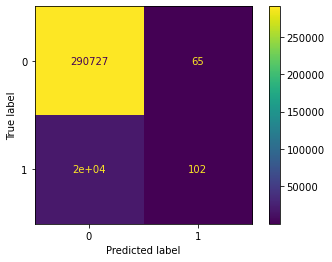

In [96]:
xm_display = ConfusionMatrixDisplay(cm1).plot()

In [30]:
FP = cm1[1][0]
FN = cm1[0][1]
TP = cm1[0][0]
TN = cm1[1][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)
ACC = (TP+TN)/(TP+FP+FN+TN)

In [31]:
TPR

0.9997764725301934

In [32]:
TNR

0.005103317156151498

In [33]:
ACC

0.9358064734103656

In [34]:
PPV

0.9359812241639087

In [35]:
precision_recall_fscore_support(y_true=y_test, y_pred=prediction)

(array([0.93598122, 0.61077844]),
 array([0.99977647, 0.00510332]),
 array([0.96682762, 0.01012206]),
 array([290792,  19987], dtype=int64))

In [130]:
target_names = ['1','2']
print(classification_report(y_true=y_test, y_pred=prediction, target_names=target_names))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97    290792
           2       0.61      0.01      0.01     19987

    accuracy                           0.94    310779
   macro avg       0.77      0.50      0.49    310779
weighted avg       0.92      0.94      0.91    310779



In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

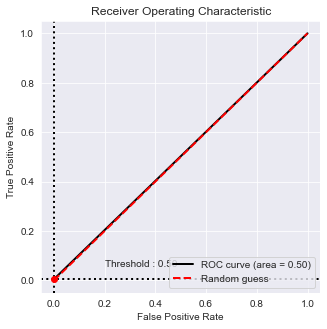

In [111]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Random Forest

In [37]:
y = y_train.values.ravel()
drought_forest= RandomForestClassifier(n_estimators=30, random_state = 350)
drought_forest.fit(X_train, y)


RandomForestClassifier(n_estimators=30, random_state=350)

In [38]:
prediction_forest=drought_forest.predict(X_test)

In [39]:
accuracy_random_forest=accuracy_score(y_true = y_test, y_pred = prediction_forest)

In [40]:
accuracy_random_forest

0.9620212433916062

In [41]:
cm2=confusion_matrix(y_true=y_test,y_pred=prediction_forest)

In [42]:
cm2

array([[290264,    528],
       [ 11275,   8712]], dtype=int64)

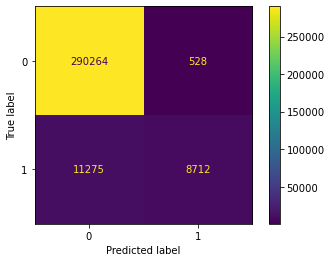

In [95]:
cm_display = ConfusionMatrixDisplay(cm2).plot()

In [43]:
FP1 = cm2[1][0]
FN1 = cm2[0][1]
TP1 = cm2[0][0]
TN1 = cm2[1][1]

TPR1 = TP1/(TP1+FN1)
TNR1 = TN1/(TN1+FP1) 
PPV1 = TP1/(TP1+FP1)
NPV1 = TN1/(TN1+FN1)
FPR1 = FP1/(FP1+TN1)
FNR1 = FN1/(TP1+FN1)
FDR1 = FP1/(TP1+FP1)
ACC1 = (TP1+TN1)/(TP1+FP1+FN1+TN1)

In [44]:
TPR1

0.9981842691683402

In [45]:
TNR1

0.43588332416070447

In [82]:
PPV1

0.9626084851379092

In [81]:
ACC1

0.9620212433916062

In [48]:
precision_recall_fscore_support(y_true=y_test, y_pred=prediction_forest)

(array([0.96260849, 0.94285714]),
 array([0.99818427, 0.43588332]),
 array([0.98007364, 0.59616108]),
 array([290792,  19987], dtype=int64))

In [129]:
target_names = ['1','2']
print(classification_report(y_true=y_test, y_pred=prediction_forest, target_names=target_names))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98    290792
           2       0.94      0.44      0.60     19987

    accuracy                           0.96    310779
   macro avg       0.95      0.72      0.79    310779
weighted avg       0.96      0.96      0.96    310779



In [128]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [106]:
from sklearn import metrics

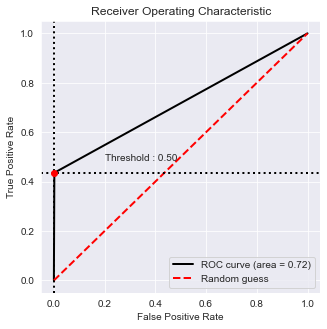

In [109]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction_forest, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## ROC curve

In [118]:
from sklearn.metrics import plot_roc_curve

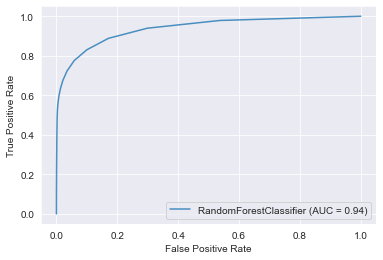

In [119]:
#RANDOm forest ROC curve
ax = plt.gca()
rfc_disp = plot_roc_curve(drought_forest, X_test, y_test, ax=ax, alpha=0.8)


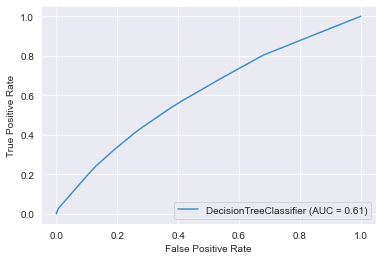

In [121]:
#DECISION TREE ROC CURVE
ax = plt.gca()
rfc_disp = plot_roc_curve(drought_classifier, X_test, y_test, ax=ax, alpha=0.8)


In [112]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

## precision-Recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

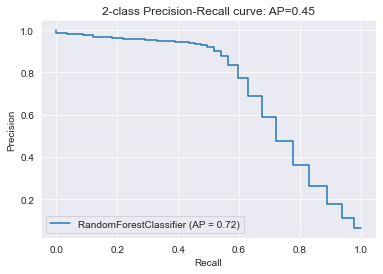

In [124]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(drought_forest, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [125]:
#Decision tree Precision recall curve
average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.07')

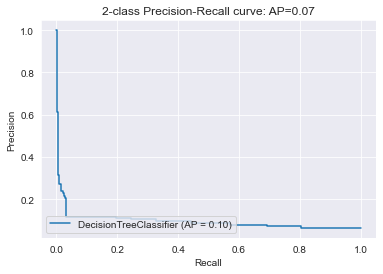

In [126]:
disp = plot_precision_recall_curve(drought_classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

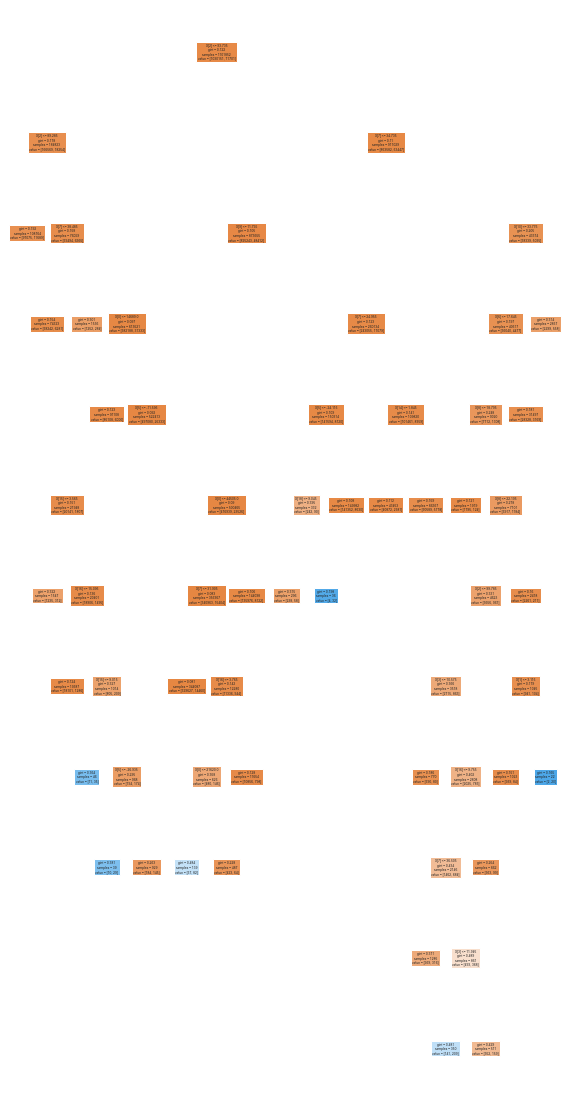

In [139]:
  from sklearn import tree
  fig = plt.figure(figsize=(10,20))
  tree.plot_tree(drought_classifier,filled=True)  
 
  plt.show()